In [1]:
from data.california_house import get_california_housing_dataset
from data.penguin import get_penguins_dataset
from linear_regression_experiements.data.adult import get_adult_dataset
from linear_regression_experiements.data.hospital import get_hospital_dataset
from utils.algorithm import *
from utils.graphs import *

%load_ext autoreload
%autoreload 2

In [2]:
def get_dataset(dataset: str) -> Tuple[List[np.ndarray], List[np.ndarray], List[np.ndarray], List[np.ndarray]]:
    if dataset == 'penguins':
        return get_penguins_dataset()
    elif dataset == 'california_house':
        return get_california_housing_dataset()
    elif dataset == 'adult':
        return get_adult_dataset()
    elif dataset == "hospital":
        return get_hospital_dataset()
    else:
        del Xs_train, Xs_test, ys_train, ys_test
        raise NotImplementedError(f'Dataset {dataset} not implemented')


Xs_train, Xs_test, ys_train, ys_test = get_dataset("hospital")
print(f"There is {len(Xs_train)} clients and {Xs_train[0].shape[1]} features")
print(f"Number of training samples: {list(map(lambda x: x.shape[0], Xs_train))}")
print(f"Number of test samples: {list(map(lambda x: x.shape[0], Xs_test))}")

There is 20 clients and 21 features
Number of training samples: [18976, 7729, 7372, 6631, 6552, 5712, 5093, 4576, 4187, 4166, 3430, 3329, 3036, 2840, 2720, 2613, 2404, 2356, 2314, 2308]
Number of test samples: [4744, 1933, 1843, 1658, 1639, 1429, 1274, 1144, 1047, 1042, 858, 833, 760, 710, 681, 654, 602, 590, 579, 578]


In [3]:
betas_local, std_squared, sizes = train(Xs_train, ys_train)
task_difficulty = std_squared / sizes
indices = np.argsort(task_difficulty)
task_difficulty = task_difficulty[indices]
std_squared = std_squared[indices]
sizes = sizes[indices]
betas_local = betas_local[indices]
Xs_train = [Xs_train[idx] for idx in indices]
Xs_test = [Xs_test[idx] for idx in indices]
ys_train = [ys_train[idx] for idx in indices]
ys_test = [ys_test[idx] for idx in indices]

In [4]:
Ws = OLS_iterative_fusion(betas_local, std_squared, num_iter=2)
betas_fusion = get_fusion_betas(betas_local, Ws)
betas_fair_fusion, C, noise = get_fair_fusion_betas(betas_local, Ws, std_squared, sizes)
mse_local = get_mse(Xs_test, ys_test, betas_local)
mse_fusion = get_mse(Xs_test, ys_test, betas_fusion)
mse_fair_fusion_mean, mse_fair_fusion_var = get_expected_fair_mse(betas_local, Ws, std_squared, sizes, Xs_test, ys_test)

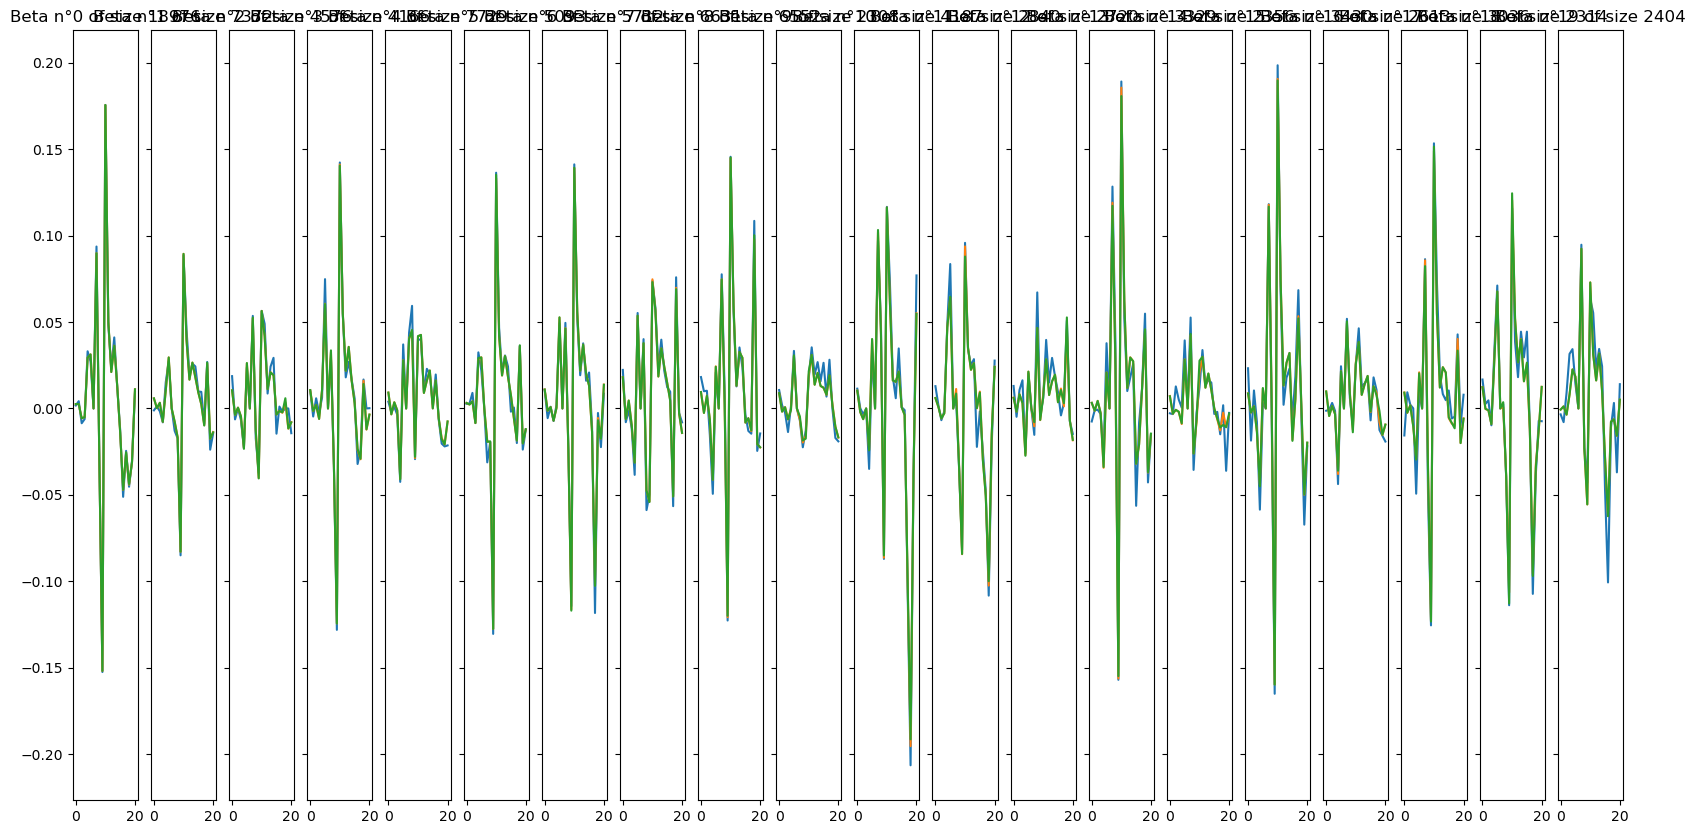

In [5]:
plot_betas(betas_local, betas_fusion, betas_fair_fusion, std_squared, sizes)

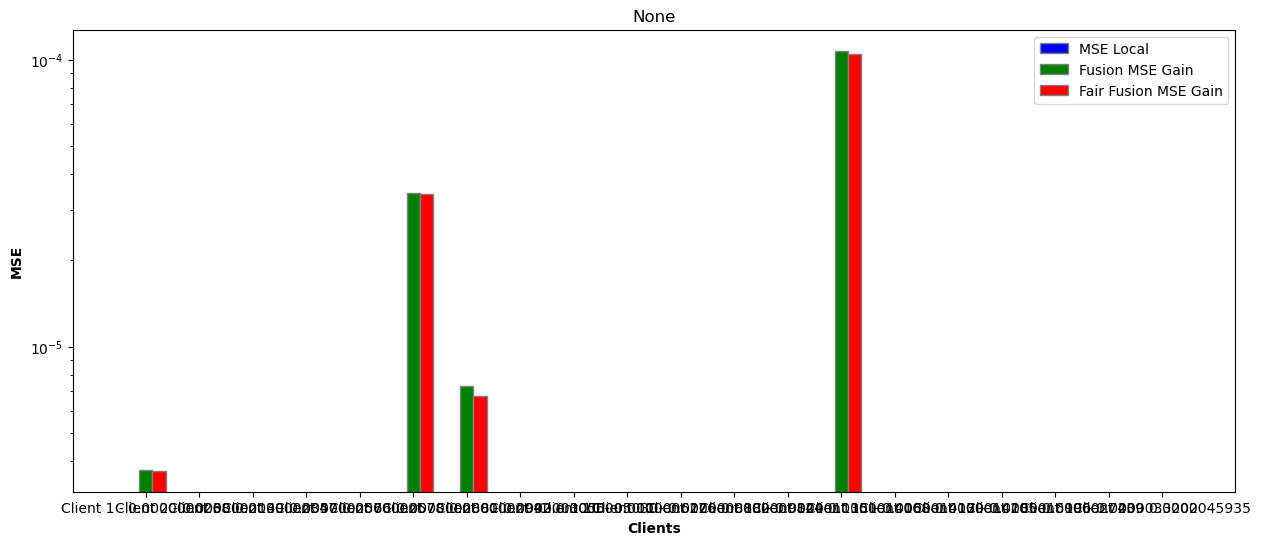

In [6]:
plot_mse_local_fusion_fair(np.zeros_like(mse_local), mse_local - mse_fusion, mse_local - mse_fair_fusion_mean, std_squared, sizes)